In [1]:
import pandas as pd


In [14]:
df_model_1 = pd.read_csv('small_eg_fzh_combined_v2_whisper_error_types.csv')
label_model_1 = 'whisper_small'

df_model_2 = pd.read_csv('small_pk_dec_error_types_0.csv')
label_model_2 = 'pk_dec'

df_error_types = pd.read_csv('error_types.csv')

In [9]:
df_model_2.keys()

Index(['wer', 'original', 'predictions', 'd1 p', 'd1 N', 'd1 warum', 'd2 p',
       'd2 N', 'd2 warum', 'd3 p', 'd3 N', 'd3 warum', 's1 p', 's1 N',
       's1 warum', 's2 p', 's2 N', 's2 warum', 's3 p', 's3 N', 's3 warum',
       's4 p', 's4 N', 's4 warum', 's5 p', 's5 N', 's5 warum', 's6 p', 's6 N',
       's6 warum', 's7 p', 's7 N', 's7 warum', 's8 p', 's8 N', 's8 warum',
       'i1 p', 'i1 N', 'i1 warum'],
      dtype='object')

In [10]:
filter_keys = ['wer', 'actual', 'target'] # 'Unnamed: 0', 'original', 'predictions', 
df_results_1  = df_model_1.drop(columns = filter_keys) 

filter_keys = ['wer','original', 'predictions']
df_results_2 = df_model_2.drop(columns = filter_keys)

In [31]:
(df_results_1['d2 warum']=='fehler').sum()
df_cleaned_1 = df_model_1[df_model_1["d2 warum"] != "fehler"]

In [34]:
len(df_cleaned_1)

2729

In [38]:
# Assign weights to each error type (example weights, can be adjusted)
# weights = {
#     "Insertion Error": 1.5,
#     "Deletion Error": 2.0,
#     "Substitution Error": 1.8,
#     "Case Sensitivity Issue": 1.2,
#     "Punctuation Error": 1.0,
#     "Numerical Error": 1.3,
#     "Contextual Misunderstanding": 2.5,
#     "Spelling Error": 1.4
# }
df_error_types[['tag','Relevanz']]
weights = df_error_types.set_index('tag')['Relevanz'].to_dict()

# Aggregate error probabilities and apply weights for Model 1
error_types = list(weights.keys())

# model_1_scores = [
#     (df_model_1[f"{error} p"]*df_model_1[f"{error} N"]).sum() for error in error_types
# ]
# model_2_scores = [
#     (df_model_2[f"{error} p"]*df_model_2[f"{error} N"]).sum() for error in error_types
# ]

# probability of error occurance
model_1_scores = []
model_2_scores = []
# df_cleaned = df[df['fehler'] != "error"]
for error in error_types:
    df_cleaned_1 = df_model_1[df_model_1[f"{error} warum"] != "fehler"]
    model_1_scores += [(df_cleaned_1[f"{error} p"]*df_cleaned_1[f"{error} N"]).sum()/ len(df_cleaned_1) ]
    
    df_cleaned_2 = df_model_2[df_model_2[f"{error} warum"] != "fehler"]
    model_2_scores += [(df_cleaned_2[f"{error} p"]*df_cleaned_2[f"{error} N"]).sum()/ len(df_cleaned_2) ]

In [39]:
model_1_scores

[0.8631187197618162,
 0.8398680835470869,
 0.3249533059394845,
 0.7841217455078842,
 0.6816824471959214,
 0.6983425414364641,
 1.0017103347889373,
 0.49996360989810773,
 0.7400740740740741,
 0.7622222222222222,
 0.6370397375136712,
 0.8284040995607614]

In [16]:
df_error_types

,Fehlerkategorie,Fehlertyp,Definition,Relevanz,Beispiel,tag
0,fehlende einzelne Wörter (bedeutungslos)\nmiss...,Deletion,ASR** erkennt/transkribiert einzelne Wörter ni...,2,"Artikel vor einem Nomen/Substantiv, z.B. „die""...",d1
1,fehlende einzelne Wörter (bedeutungsvoll)\nmis...,Deletion,"ASR erkennt einzelne, für das Verständnis rele...",8,NaN,d2
2,fehlende Teilsätze\nmissing sub-sentences,Deletion,ASR erkennt/transkribiert einen Teil eines ges...,8,NaN,d3
3,ähnlich klingende Wörter oder Wortgruppen\n\ns...,Substitution,ASR erkennt eine Wortgruppe nicht oder nur tei...,8,"ASR: ""Canada societal impact""\nORIGINAL: ""kind...",s1
4,falsch verstandene Eigennamen\nmisunderstood p...,Substitution,"ASR erkennt historische Begriffe, Orte und Eig...",9,"ASR: ""Facebook""\nORIGINAL: ""Feldpost""\nASR: ""K...",s2
5,falsche Wortendungen / gleicher Wortstamm\nwor...,Substitution,ASR erkennt nur einen Teil eines gesprochenen ...,4,"ASR: ""Augenschein""\nORIGINAL: ""augenscheinlich""",s3
6,Rechtschreibfehler\nspelling mistakes,Substitution,ASR transkribiert Wörter nicht korrekt gemäß d...,2,NaN,s4
7,falsche Sprecherzuordnung\nwrong speaker assig...,Substitution,ASR weist einem transkribierten Satz nicht den...,2,NaN,s5
8,Glättung Grammatik\nSmoothing,Substitution,ASR transkribiert einen grammatikalisch falsch...,5,"ASR: ""Ja also da war ich auch schon als Schüle...",s6
9,Glättung Dialekt/Akzent\nSmoothing,Substitution,ASR transformiert die mit Dialekt/Akzent gespr...,3,"ASR: ""Ich weiß, ich bin ein waschechter Berlin...",s7


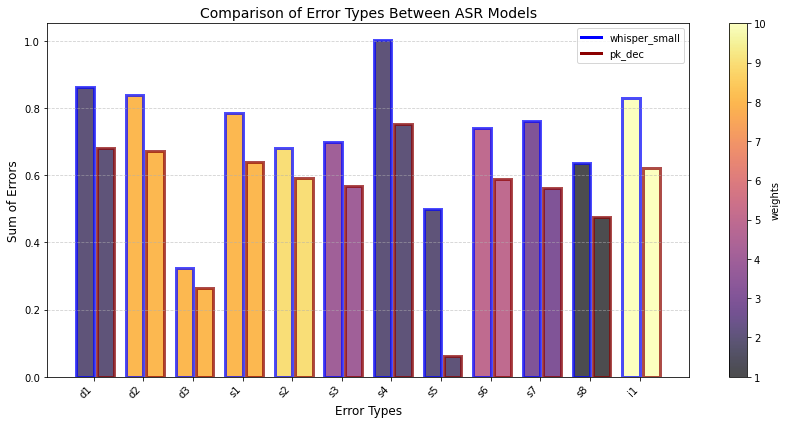

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization: Bar Plot
x = np.arange(len(error_types))
width = 0.35
lw = 3

# Normalize the weights to a range of 0 to 1 (for colormap)
norm = plt.Normalize(min(weights.values()), max(weights.values()))
colors = plt.cm.inferno(norm(list(weights.values())))  # Use the 'viridis' colormap

epsilon = 0.06
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, model_1_scores, width, label='Model 1', edgecolor='blue', linewidth=lw,  alpha=0.7, color=colors)
plt.bar(x + width/2 + epsilon, model_2_scores, width, label='Model 2',edgecolor='darkred', linewidth=lw, alpha=0.7, color=colors)

# Add a colorbar to show the mapping
sm = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='weights', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Error Types', fontsize=12)
plt.ylabel('Sum of Errors', fontsize=12)
plt.title('Comparison of Error Types Between ASR Models', fontsize=14)
plt.xticks(x, error_types, rotation=45, ha='right', fontsize=10)
# Adjust the legend to show only the border colors
legend_handles = [
    plt.Line2D([0], [0], color='blue', linewidth=lw, label=label_model_1),
    plt.Line2D([0], [0], color='darkred', linewidth=lw, label=label_model_2)
]
plt.legend(handles=legend_handles)
# plt.legend(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [17]:
model_1_scores

[2319.2000000000003,
 2292.0,
 869.9,
 2138.3,
 1871.9,
 1896.0,
 2752.7,
 1373.9,
 1998.2,
 2092.3,
 1747.4,
 2263.2000000000003]

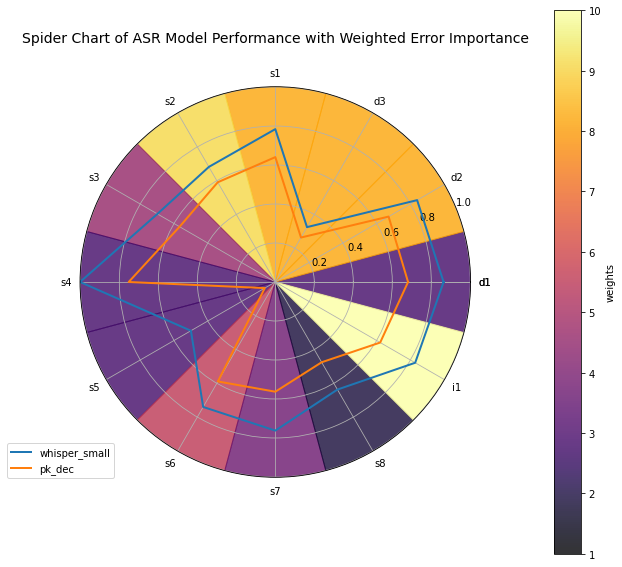

In [41]:
from math import pi
from matplotlib.patches import Rectangle
from math import degrees
# Adjusting for proper alignment between angles and categories
# Close the loop for angles and categories correctly

angles = [n / float(len(error_types)) * 2 * pi for n in range(len(error_types))]
angles += angles[:1]  # Close the loop for angles

categories = error_types + [error_types[0]]# Use all categories including the loop closure

model_1_scores_ = model_1_scores + [model_1_scores[0]]  # Closing the loop for spider chart
model_2_scores_ = model_2_scores + [model_2_scores[0]]
max_score = max(max(model_2_scores),max(model_1_scores))

# Normalize weights for background color intensity (0 to 1 scale)
normalized_weights = np.array(list(weights.values())) / max(weights.values())

# Initialize spider chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Background color based on weights
delta_angles = 1*(angles[2]-angles[1])*0.5
# for i in range(len(normalized_weights) - 1):  # Avoid closing loop element for background
#     ax.fill_between(
#         [angles[i]+delta_angles, angles[i + 1]+delta_angles],
#         0,
#         max_score,
#         color=plt.cm.inferno(normalized_weights[i]),
#         alpha=0.2,
#     )
# Draw wedges
for i in range(len(normalized_weights) ):
    # Calculate start and end angles in degrees
    start_angle = angles[i] - delta_angles
    end_angle = 2*delta_angles #angles[i + 1] #+ delta_angles
#     print(start_angle)
#     print(end_angle)
    # Create and add the wedge
    rect = Rectangle((start_angle, max_score), end_angle, max_score*(-1), color=plt.cm.inferno(normalized_weights[i]),alpha=0.8)
#     wedge = Wedge(
#         center=(0, 0),  # Center of the circle
#         r=10,  # Outer radius
#         theta1=0, #start_angle,  # Start angle in degrees
#         theta2=360, #end_angle,  # End angle in degrees
#         color=plt.cm.inferno(normalized_weights[i]),  # Fill color
#         alpha=0.2  # Transparency
#     )
    ax.add_patch(rect)
# ax.scatter(0,0)
ax.set_ylim(0, max_score)

# Add a colorbar to show the mapping
sm = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='weights', pad=0.15, alpha=0.8)


# Plot data
ax.plot(angles, model_1_scores_, linewidth=2, linestyle='solid', label=label_model_1)
# ax.fill(angles, model_1_scores_, alpha=0.25)

ax.plot(angles, model_2_scores_, linewidth=2, linestyle='solid', label=label_model_2)
# ax.fill(angles, model_2_scores_, alpha=0.25)

# Add category labels
# ax.set_yticks([])  # Hide radial axis labels

ax.set_xticks(angles)  # Adjust for closing loop
ax.set_xticklabels(categories, fontsize=10, ha='center', va='center', rotation=45)

# Title and legend
plt.title("Spider Chart of ASR Model Performance with Weighted Error Importance", size=14, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


In [231]:
weights

{'Insertion Error': 1.5,
 'Deletion Error': 2.0,
 'Substitution Error': 1.8,
 'Case Sensitivity Issue': 1.2,
 'Punctuation Error': 1.0,
 'Numerical Error': 1.3,
 'Contextual Misunderstanding': 2.5,
 'Spelling Error': 1.4}